In [27]:
%matplotlib inline

In [28]:
import pandas as pd
import numpy as np


df = pd.read_csv("mldataset.csv")   
df.head()

,subject_id,urine_output_mean,creatinine_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,sbp_mean,lactate_mean,age,label,creatinine_change
0,10033740,3465.454545,1.175000,1.1,1.1,1.000000,Improving,70.854237,108.023729,2.166667,76,Improving_Recovered,0.0
1,14378086,106.666667,2.497222,1.5,1.6,0.937500,Improving,74.378049,107.659091,6.775000,68,Improving_Recovered,-0.1
2,10653347,820.777778,1.786667,1.1,3.1,0.354839,Worsening,73.918367,110.857143,1.926087,52,Worsening,-2.0
3,18687772,1063.467290,2.391244,0.8,2.9,0.275862,Worsening,75.543478,119.424242,2.071429,59,Worsening,-2.1
4,13191989,1367.041667,1.082884,0.5,1.4,0.357143,Worsening,83.741636,111.830882,9.942857,23,Worsening,-0.9


In [29]:
df.shape

(2772, 13)

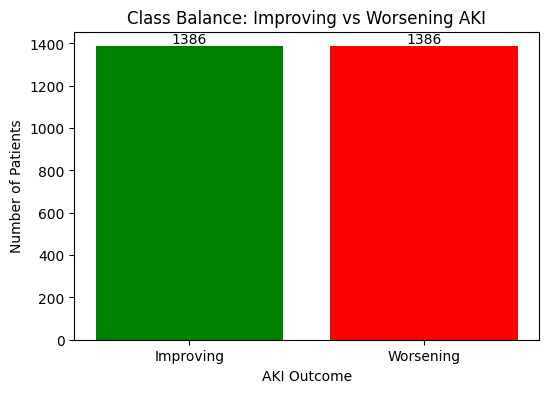

In [30]:
import matplotlib.pyplot as plt
counts = df['label'].value_counts()

counts.index = counts.index.map({
    'Improving_Recovered': 'Improving',
    'Worsening': 'Worsening'
})
plt.figure(figsize=(6,4))
bars = plt.bar(
    counts.index,
    counts.values,
    color=['green', 'red']
)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center', va='bottom'
    )
plt.title("Class Balance: Improving vs Worsening AKI")
plt.xlabel("AKI Outcome")
plt.ylabel("Number of Patients")
plt.show()

/tmp/ipykernel_1785454/719478153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1785454/719478153.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


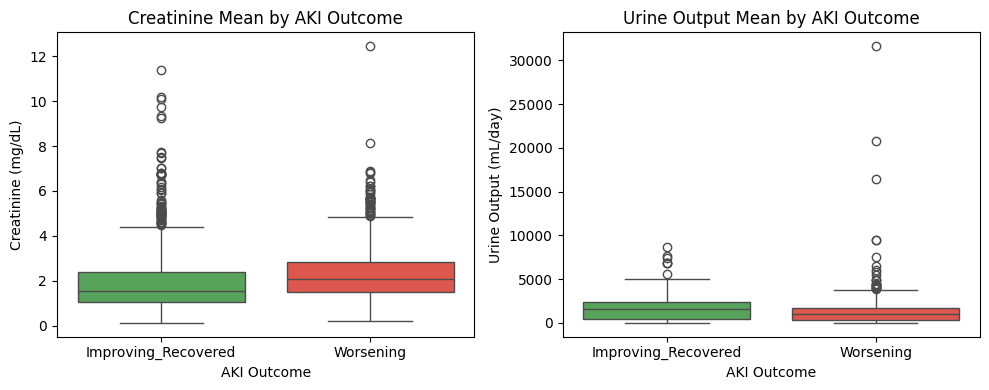

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

# Boxplot for creatinine_mean
plt.subplot(1, 2, 1)
sns.boxplot(
    x='label',
    y='creatinine_mean',
    data=df,
    palette=['#4CAF50', '#F44336']
)
plt.title("Creatinine Mean by AKI Outcome")
plt.xlabel("AKI Outcome")
plt.ylabel("Creatinine (mg/dL)")

# Boxplot for urine_output_mean
plt.subplot(1, 2, 2)
sns.boxplot(
    x='label',
    y='urine_output_mean',
    data=df,
    palette=['#4CAF50', '#F44336']
)
plt.title("Urine Output Mean by AKI Outcome")
plt.xlabel("AKI Outcome")
plt.ylabel("Urine Output (mL/day)")

plt.tight_layout()
plt.show()


In [33]:
df['label_display'] = df['label'].replace({
    'Improving_Recovered': 'Improving',
    'Worsening': 'Worsening'
})

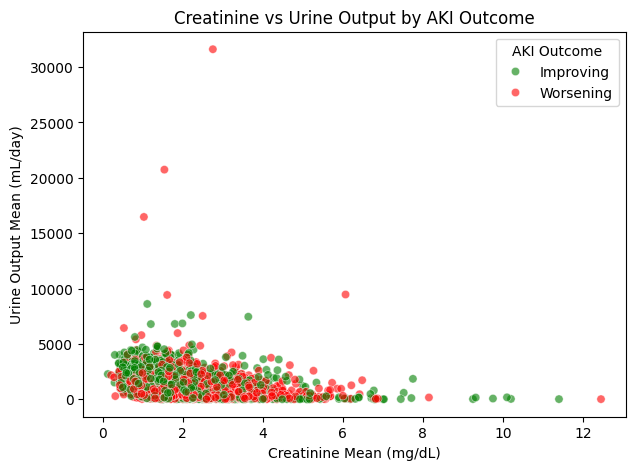

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='creatinine_mean',
    y='urine_output_mean',
    hue='label_display',
    palette={'Improving': 'green', 'Worsening': 'red'},
    alpha=0.6
)

plt.title("Creatinine vs Urine Output by AKI Outcome")
plt.xlabel("Creatinine Mean (mg/dL)")
plt.ylabel("Urine Output Mean (mL/day)")
plt.legend(title="AKI Outcome")
plt.show()


In [9]:
df['label_display'] = df['label'].replace({
    'Improving_Recovered': 'Improving',
    'Worsening': 'Worsening'
})

In [38]:
from scipy.stats import mannwhitneyu

continuous_vars = [
    'creatinine_mean',
    'first_creat',
    'urine_output_mean',
    'map_mean',
    'sbp_mean',
    'lactate_mean',
    'age'
]

group_improving = df[df['label'] == 'Improving_Recovered']
group_worsening = df[df['label'] == 'Worsening']

print("\nMann–Whitney U Test Results:\n")

for col in continuous_vars:
    u_stat, p_val = mannwhitneyu(
        group_improving[col],
        group_worsening[col],
        alternative='two-sided'
    )
    print(f"{col}: U = {u_stat:.4f}, p = {p_val:.4e}")



Mann–Whitney U Test Results:

creatinine_mean: U = 720596.5000, p = 4.8885e-30
first_creat: U = 1104282.5000, p = 8.4029e-12
urine_output_mean: U = 1147615.0000, p = 6.6228e-19
map_mean: U = 1100072.0000, p = 3.4834e-11
sbp_mean: U = 1062613.0000, p = 1.2558e-06
lactate_mean: U = 826501.0000, p = 2.0197e-10
age: U = 901192.0000, p = 4.8712e-03


In [39]:
df['label_plot'] = df['label'].replace({
    'Improving_Recovered': 'Improving',
    'Worsening': 'Worsening'
})


In [40]:
features = [
    'creatinine_mean',
    'first_creat',
    'urine_output_mean',
    'map_mean',
    'sbp_mean',
    'lactate_mean',
    'age'
]


In [41]:
from scipy.stats import mannwhitneyu
print("Mann–Whitney U Test Results:\n")
for col in features:
    grp_improve = df[df['label_plot'] == 'Improving'][col]
    grp_worsen  = df[df['label_plot'] == 'Worsening'][col]

    u_stat, p_val = mannwhitneyu(grp_improve, grp_worsen, alternative='two-sided')
    print(f"{col:20s}  U = {u_stat:.2f} | p = {p_val:.4e}")

Mann–Whitney U Test Results:

creatinine_mean       U = 720596.50 | p = 4.8885e-30
first_creat           U = 1104282.50 | p = 8.4029e-12
urine_output_mean     U = 1147615.00 | p = 6.6228e-19
map_mean              U = 1100072.00 | p = 3.4834e-11
sbp_mean              U = 1062613.00 | p = 1.2558e-06
lactate_mean          U = 826501.00 | p = 2.0197e-10
age                   U = 901192.00 | p = 4.8712e-03


In [42]:
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series[(series >= Q1 - 1.5*IQR) & (series <= Q3 + 1.5*IQR)]


/tmp/ipykernel_1785454/1403061667.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


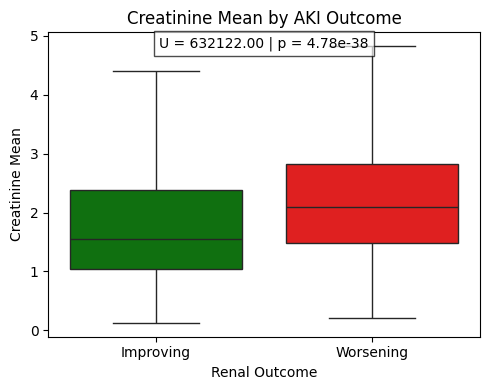

/tmp/ipykernel_1785454/1403061667.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


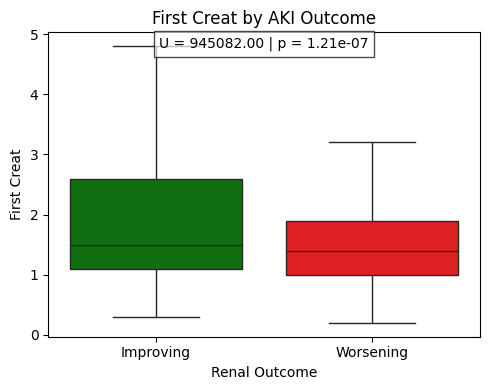

/tmp/ipykernel_1785454/1403061667.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


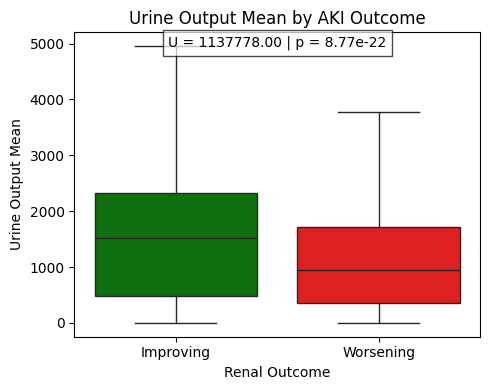

/tmp/ipykernel_1785454/1403061667.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


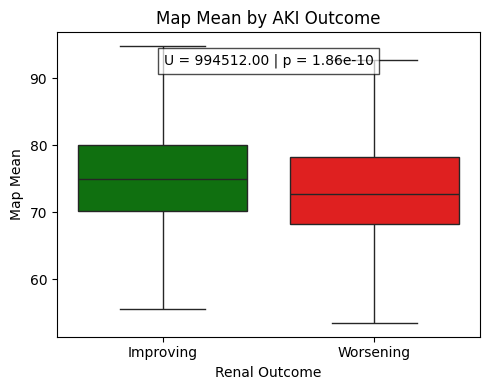

/tmp/ipykernel_1785454/1403061667.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


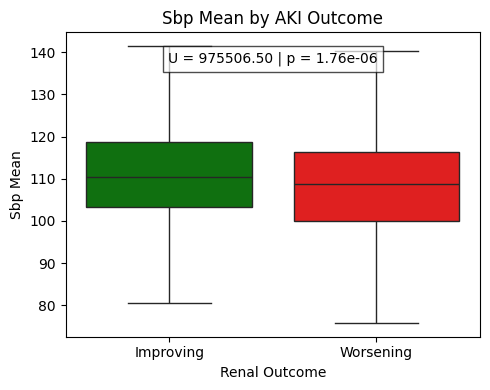

/tmp/ipykernel_1785454/1403061667.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


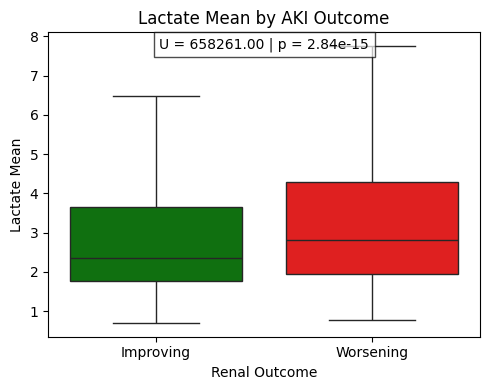

/tmp/ipykernel_1785454/1403061667.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


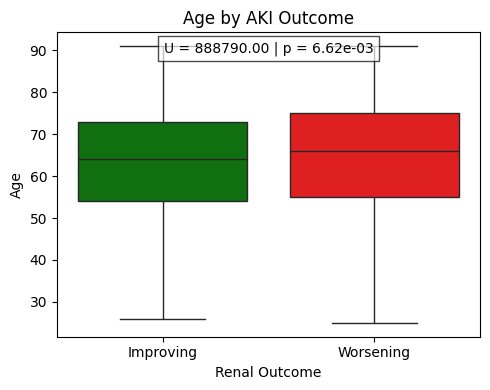

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in features:
    temp_df = df[['label_plot', col]].dropna()
    clean_vals = []
    for grp in ['Improving', 'Worsening']:
        vals = remove_outliers_iqr(temp_df[temp_df['label_plot'] == grp][col])
        clean_vals.append(vals)
    u_stat, p_val = mannwhitneyu(clean_vals[0], clean_vals[1], alternative='two-sided')
    plt.figure(figsize=(5,4))
    sns.boxplot(
        x='label_plot',
        y=col,
        data=temp_df,
        palette={'Improving':'green', 'Worsening':'red'},
        showfliers=False
    )
    plt.title(f"{col.replace('_',' ').title()} by AKI Outcome")
    plt.xlabel("Renal Outcome")
    plt.ylabel(col.replace('_',' ').title())
    plt.text(
        0.5, 
        plt.ylim()[1]*0.95,
        f"U = {u_stat:.2f} | p = {p_val:.2e}",
        ha='center',
        bbox=dict(facecolor='white', alpha=0.7)
    )
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


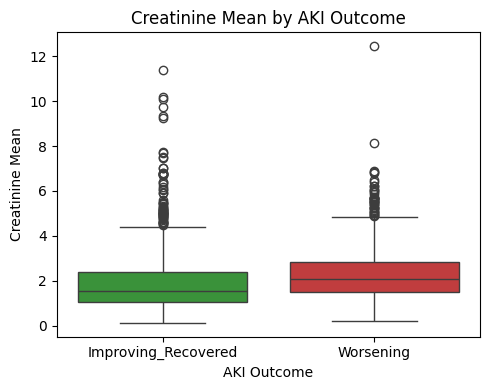

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


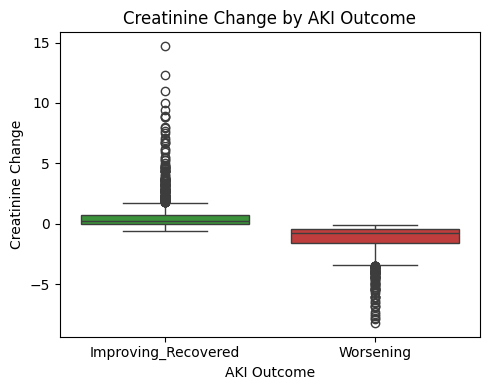

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


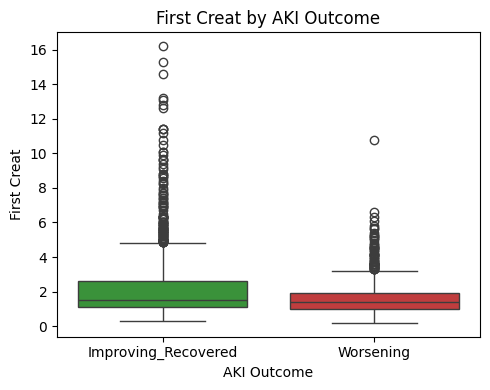

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


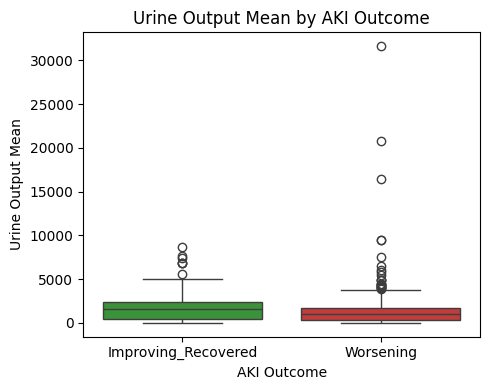

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


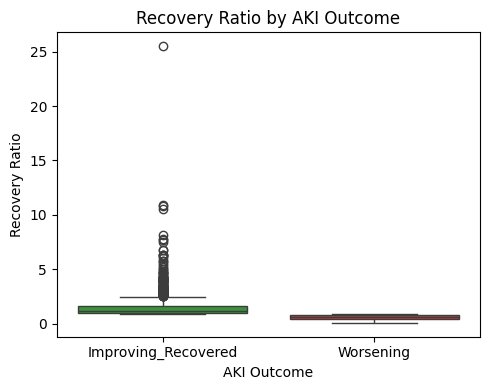

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


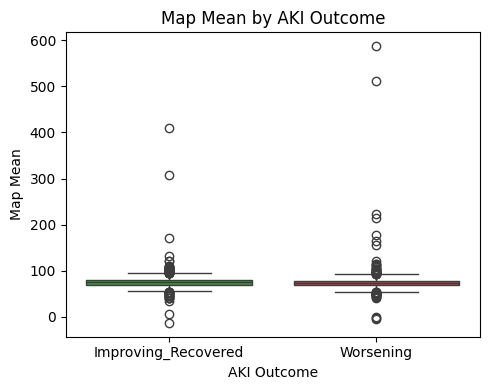

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


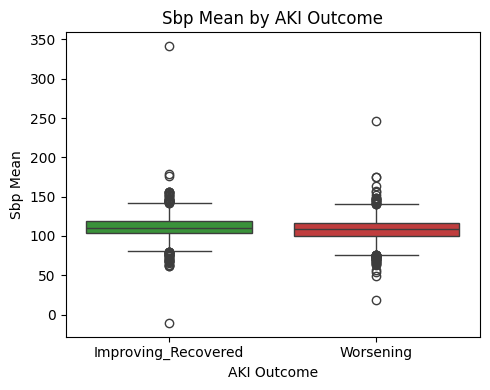

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


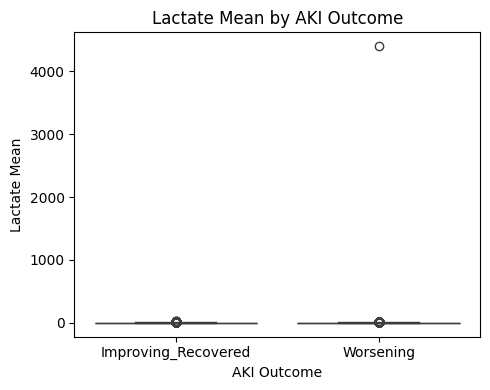

/tmp/ipykernel_1785454/2607751650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


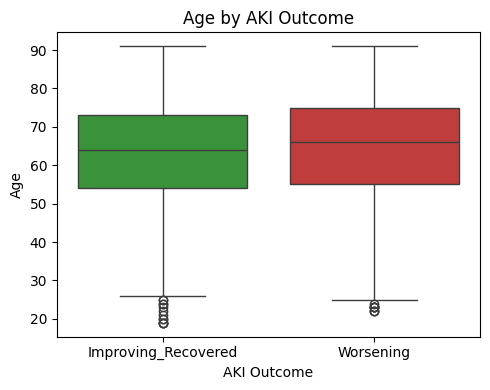

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = [
    'creatinine_mean',
    'creatinine_change',
    'first_creat',
    'urine_output_mean',
    'recovery_ratio',
    'map_mean',
    'sbp_mean',
    'lactate_mean',
    'age'
]

for var in variables:
    plt.figure(figsize=(5,4))
    sns.boxplot(
        x='label',
        y=var,
        data=df,
        palette={'Improving_Recovered':'#2ca02c', 'Worsening':'#d62728'}
    )
    plt.title(f'{var.replace("_"," ").title()} by AKI Outcome')
    plt.xlabel('AKI Outcome')
    plt.ylabel(var.replace("_"," ").title())
    plt.tight_layout()
    plt.show()


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [46]:
df['label_plot'] = df['label'].replace({
    'Improving_Recovered': 'Improving',
    'Worsening': 'Worsening'
})


/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


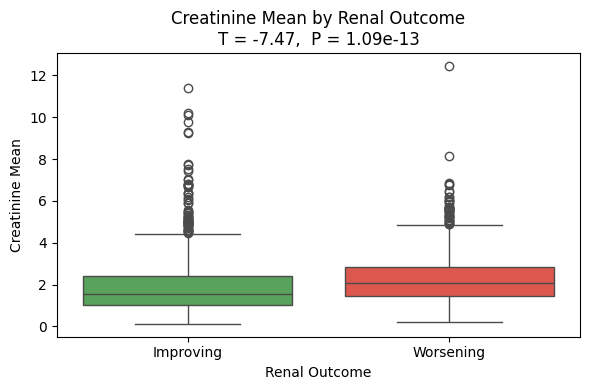

/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


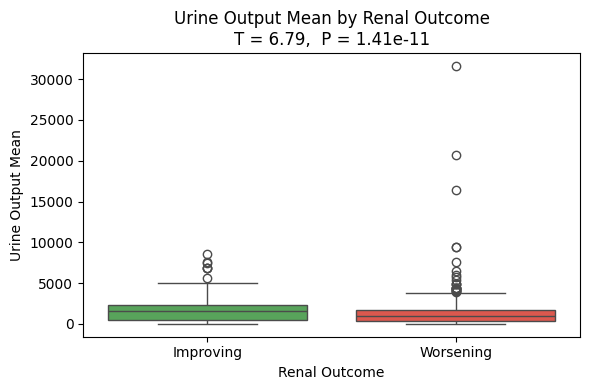

/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


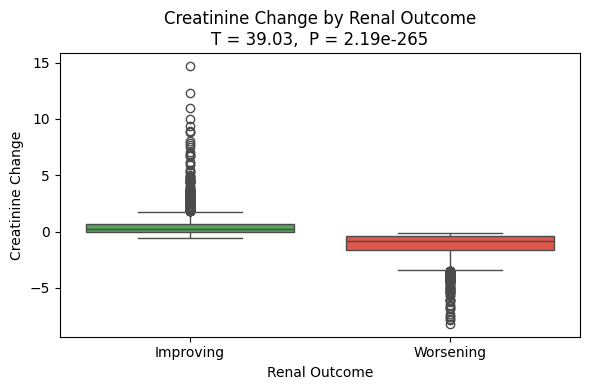

/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


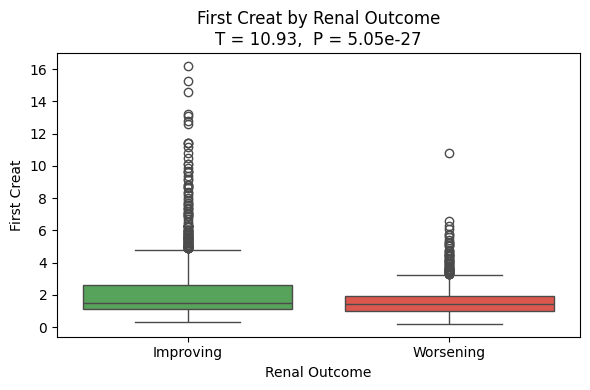

/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


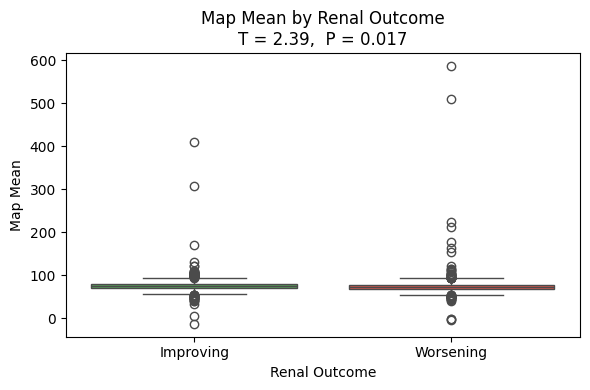

/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


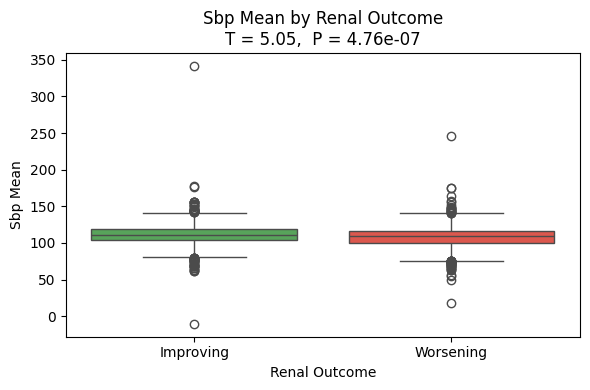

/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


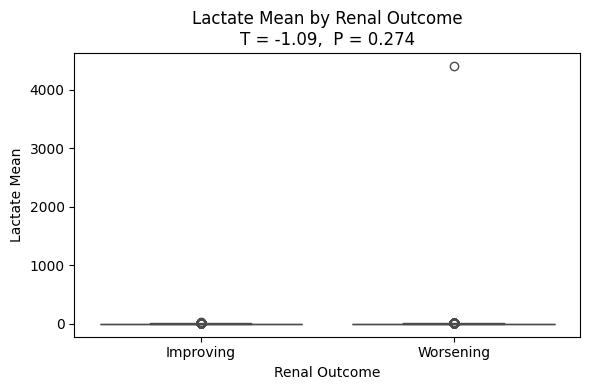

/tmp/ipykernel_1785454/2495918654.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


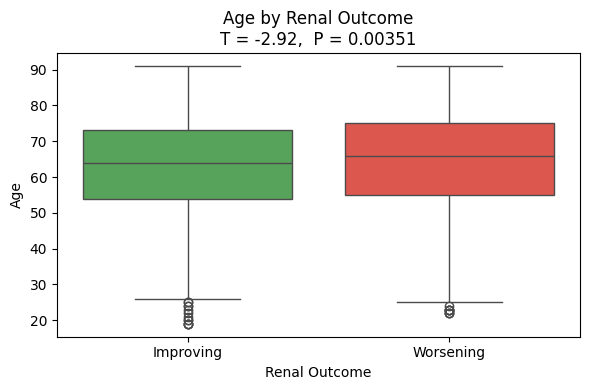

In [47]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
variables = [
    'creatinine_mean',
    'urine_output_mean',
    'creatinine_change',
    'first_creat',
    'map_mean',
    'sbp_mean',
    'lactate_mean',
    'age'
]
for var in variables:
    improving = df[df['label_plot'] == 'Improving'][var].dropna()
    worsening = df[df['label_plot'] == 'Worsening'][var].dropna()

    t_stat, p_val = ttest_ind(improving, worsening, equal_var=False)

    plt.figure(figsize=(6,4))
    sns.boxplot(
        x='label_plot',
        y=var,
        data=df,
        palette=['#4CAF50', '#F44336']  # green / red
    )
    plt.title(
        f"{var.replace('_', ' ').title()} by Renal Outcome\n"
        f"T = {t_stat:.2f},  P = {p_val:.3g}"
    )
    plt.xlabel("Renal Outcome")
    plt.ylabel(var.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()

In [48]:
plot_vars = {
    'creatinine_mean': 8,
    'creatinine_change': 5,
    'urine_output_mean': 10000,
    'map_mean': 150,
    'sbp_mean': 200,
    'lactate_mean': 15,
    'age': 100
}


In [49]:
df['label_plot'] = df['label'].replace({
    'Improving_Recovered': 'Improving',
    'Worsening': 'Worsening'
})


/tmp/ipykernel_1785454/2781429358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


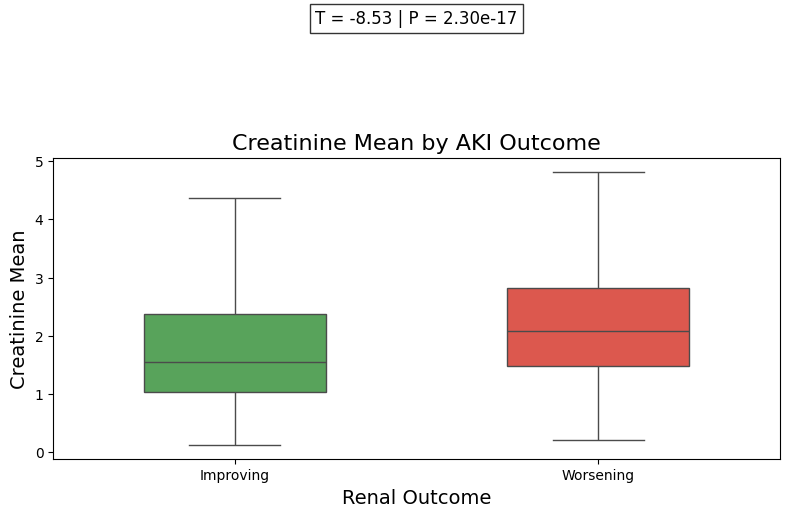

/tmp/ipykernel_1785454/2781429358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


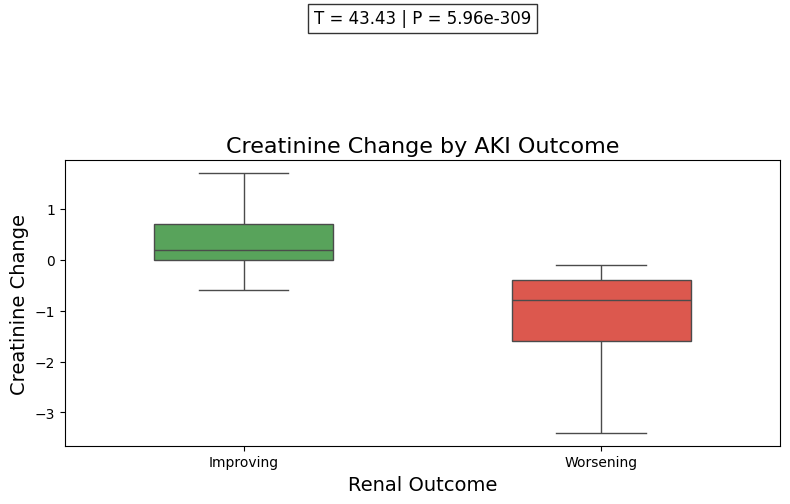

/tmp/ipykernel_1785454/2781429358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


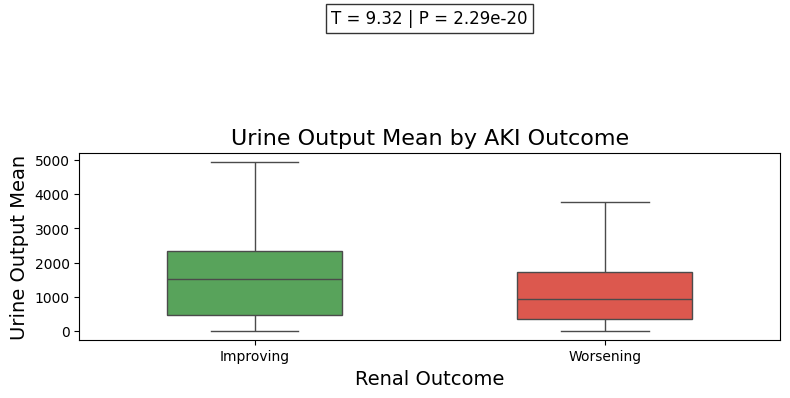

/tmp/ipykernel_1785454/2781429358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


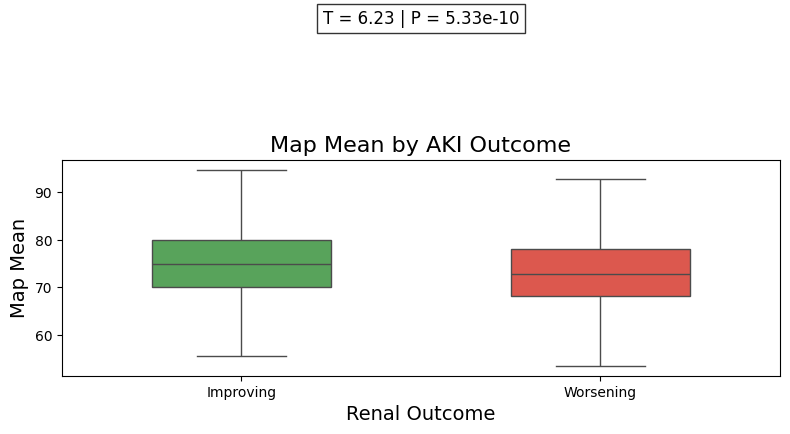

/tmp/ipykernel_1785454/2781429358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


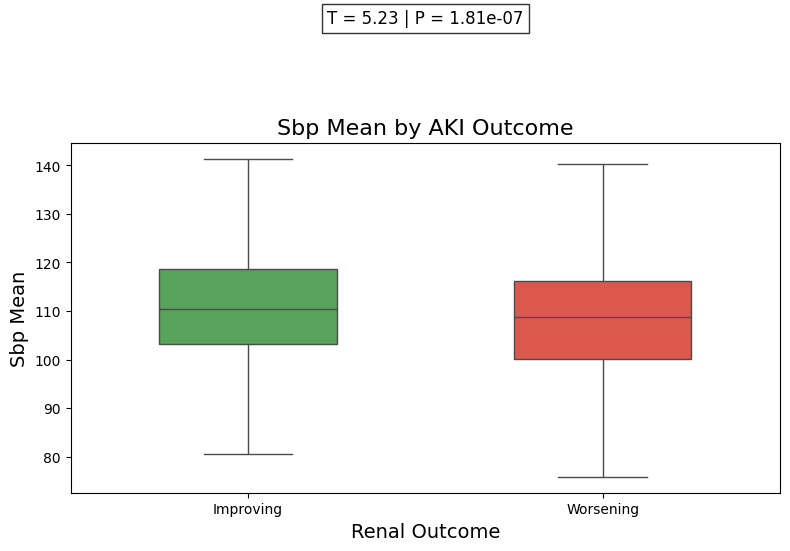

/tmp/ipykernel_1785454/2781429358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


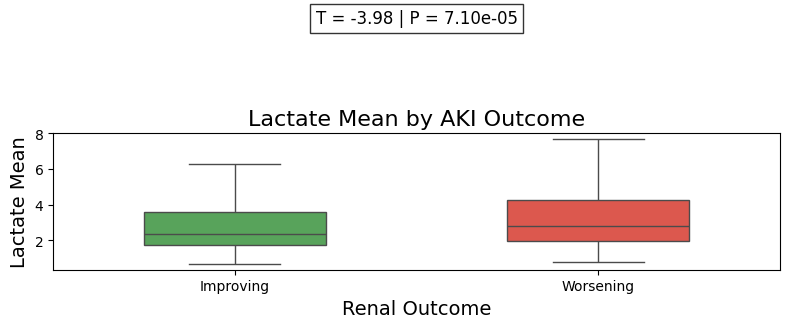

/tmp/ipykernel_1785454/2781429358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


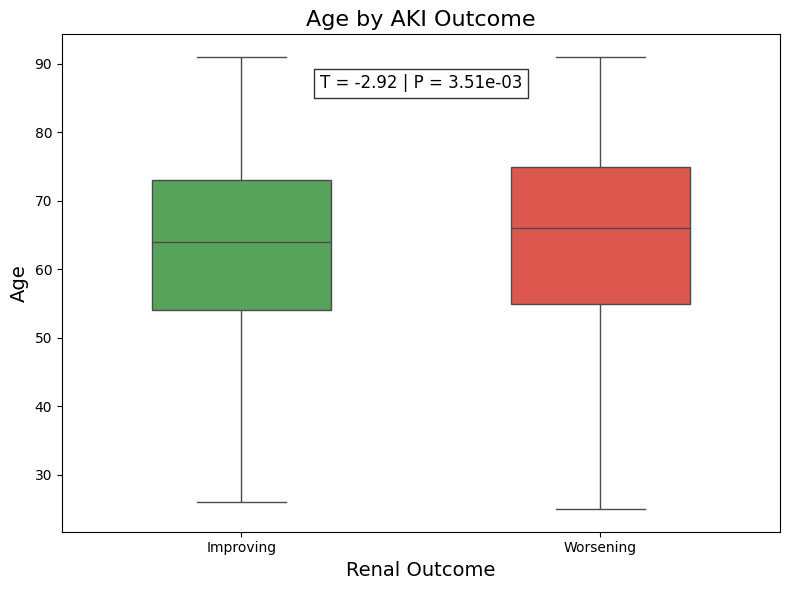

In [50]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

for var, cutoff in plot_vars.items():

    data = df[df[var] < cutoff]

    group_improving = data[data['label_plot'] == 'Improving'][var]
    group_worsening = data[data['label_plot'] == 'Worsening'][var]

    t_stat, p_val = ttest_ind(
        group_improving,
        group_worsening,
        equal_var=False,
        nan_policy='omit'
    )

    plt.figure(figsize=(8, 6))

    sns.boxplot(
        x='label_plot',
        y=var,
        data=data,
        palette=['#4CAF50', '#F44336'],
        width=0.5,
        showfliers=False
    )

    plt.title(f"{var.replace('_',' ').title()} by AKI Outcome", fontsize=16)
    plt.xlabel("Renal Outcome", fontsize=14)
    plt.ylabel(var.replace('_',' ').title(), fontsize=14)

    plt.text(
        0.5, data[var].max()*0.95,
        f"T = {t_stat:.2f} | P = {p_val:.2e}",
        ha='center',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()


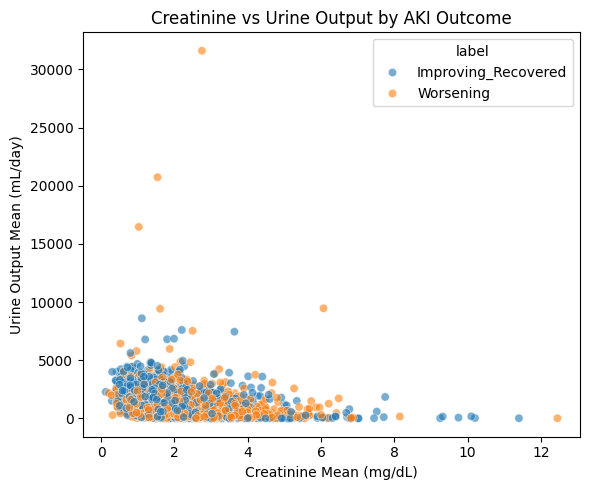

In [51]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x='creatinine_mean',
    y='urine_output_mean',
    hue='label',
    alpha=0.6
)
plt.title('Creatinine vs Urine Output by AKI Outcome')
plt.xlabel('Creatinine Mean (mg/dL)')
plt.ylabel('Urine Output Mean (mL/day)')
plt.tight_layout()
plt.show()


In [52]:
df['label_plot'] = df['label'].replace({
    'Improving_Recovered': 'Improving',
    'Worsening': 'Worsening'
})


In [53]:
plot_vars = {
    'creatinine_mean': 8,
    'urine_output_mean': 10000,
    'map_mean': 150,
    'sbp_mean': 200,
    'lactate_mean': 15,
    'age': 100,
    'first_creat': 8,
    'last_creat': 8,
    'creatinine_change': 10
}


/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


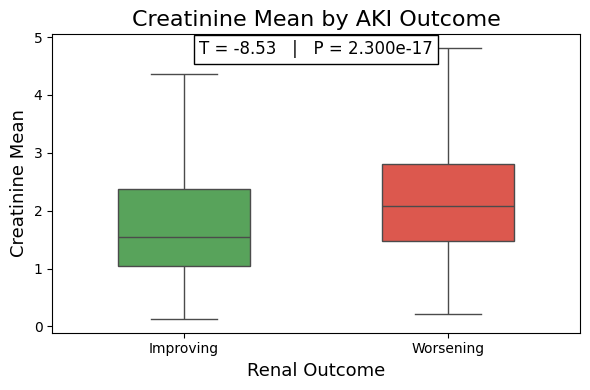

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


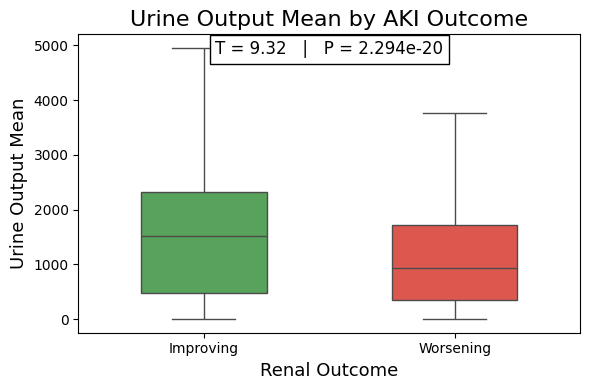

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


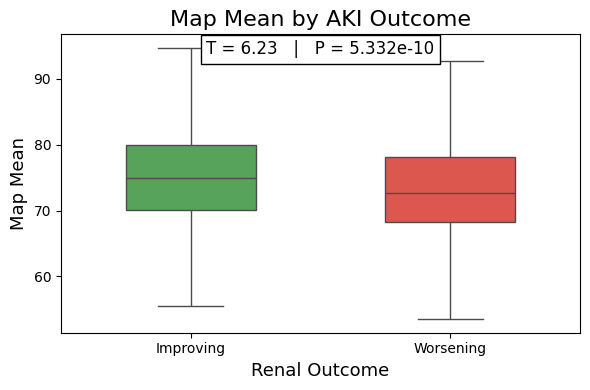

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


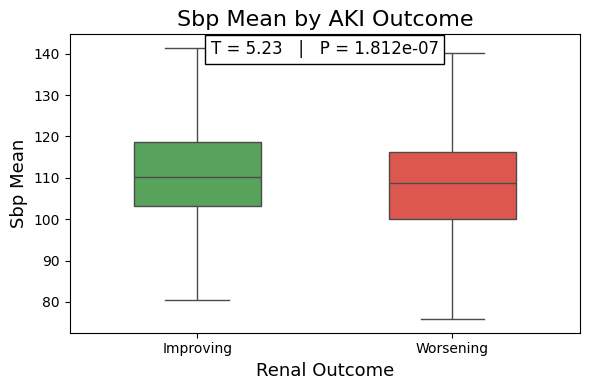

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


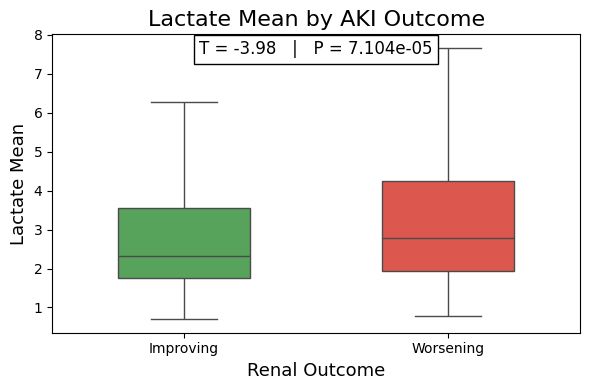

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


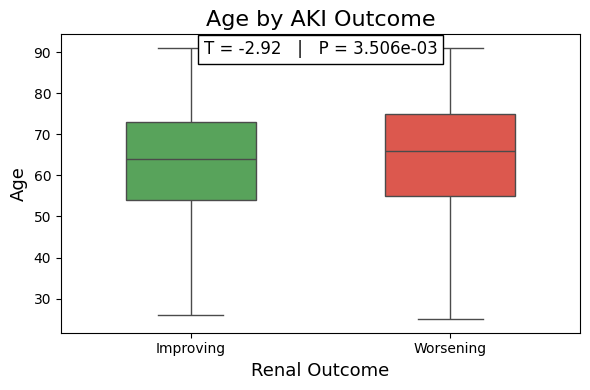

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


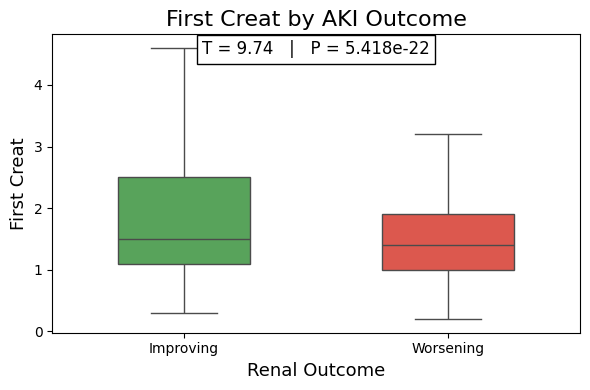

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


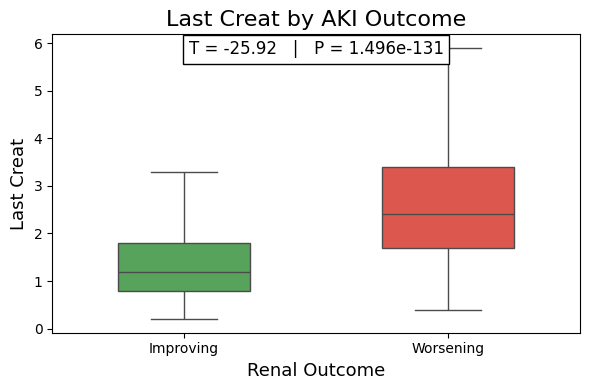

/tmp/ipykernel_1785454/1604161508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


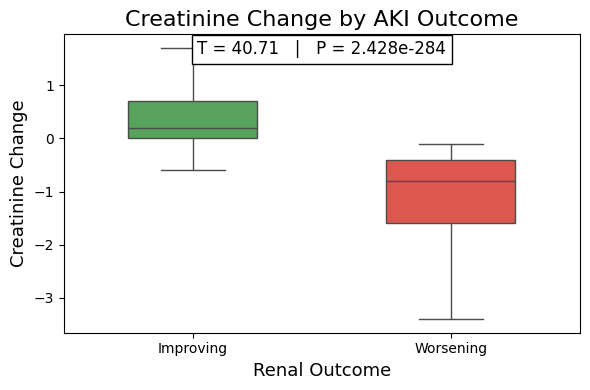

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

for var, cutoff in plot_vars.items():
    data = df[df[var] < cutoff]

    group_improving = data[data['label_plot'] == 'Improving'][var]
    group_worsening = data[data['label_plot'] == 'Worsening'][var]

    t_stat, p_val = ttest_ind(group_improving, group_worsening, equal_var=False)

    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x='label_plot',
        y=var,
        data=data,
        palette=['#4CAF50', '#F44336'],
        width=0.5,
        showfliers=False
    )

    plt.title(f"{var.replace('_', ' ').title()} by AKI Outcome", fontsize=16)
    plt.xlabel("Renal Outcome", fontsize=13)
    plt.ylabel(var.replace('_', ' ').title(), fontsize=13)

    # Add T and P values on plot
    plt.text(
        0.5, 0.95,
        f"T = {t_stat:.2f}   |   P = {p_val:.3e}",
        ha='center',
        va='center',
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black')
    )

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_1785454/1517730242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


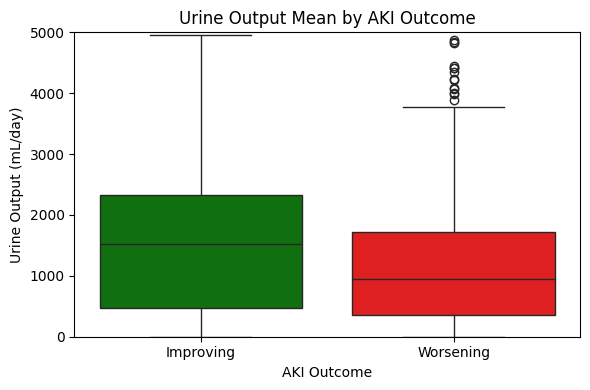

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.boxplot(
    x='label_plot',          
    y='urine_output_mean',
    data=df,
    palette=['green', 'red']
)

plt.ylim(0, 5000)   
plt.title('Urine Output Mean by AKI Outcome')
plt.ylabel('Urine Output (mL/day)')
plt.xlabel('AKI Outcome')

plt.tight_layout()
plt.show()


In [72]:

median_diff_creat = (
    df[df['label'] == 'Improving_Recovered']['creatinine_mean'].median()
    - df[df['label'] == 'Worsening']['creatinine_mean'].median()
)

median_diff_urine = (
    df[df['label'] == 'Improving_Recovered']['urine_output_mean'].median()
    - df[df['label'] == 'Worsening']['urine_output_mean'].median()
)

median_diff_creat, median_diff_urine

(np.float64(-0.5353010224999999), np.float64(572.90238115))

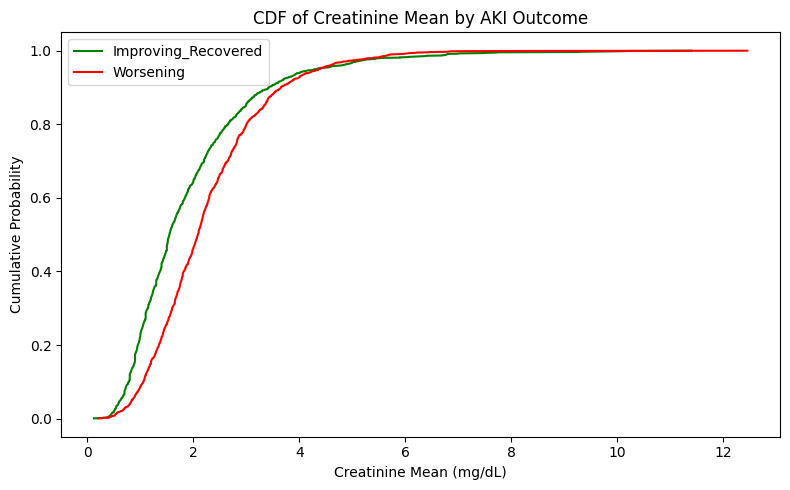

In [75]:
import numpy as np

plt.figure(figsize=(8,5))

for label, color in zip(['Improving_Recovered', 'Worsening'], ['green', 'red']):
    data = np.sort(df[df['label'] == label]['creatinine_mean'])
    cdf = np.arange(1, len(data)+1) / len(data)
    plt.plot(data, cdf, label=label, color=color)

plt.xlabel('Creatinine Mean (mg/dL)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Creatinine Mean by AKI Outcome')
plt.legend()
plt.tight_layout()
plt.show()


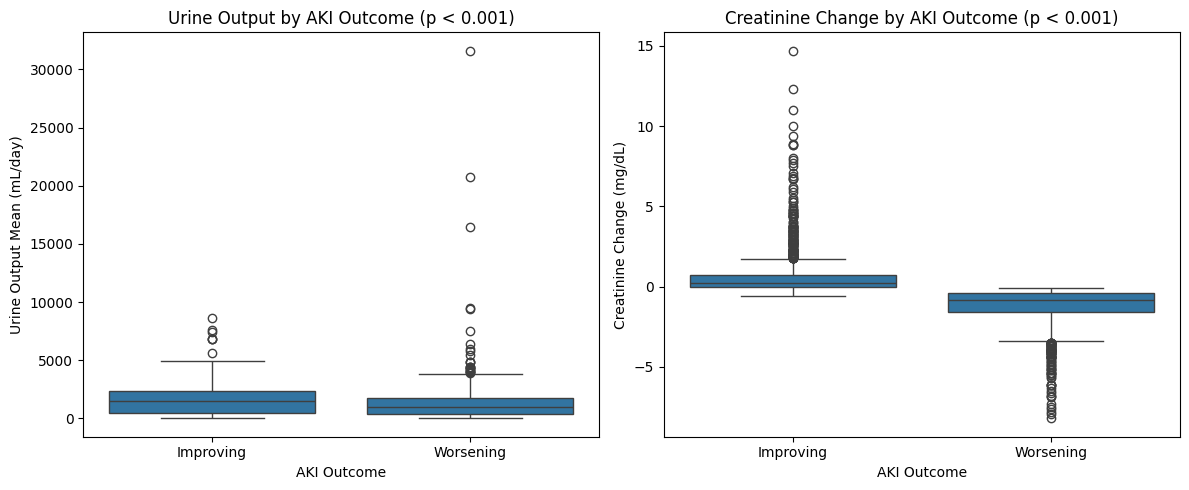

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Urine Output
sns.boxplot(
    data=df,
    x='label_display',
    y='urine_output_mean',
    ax=axes[0]
)
axes[0].set_title("Urine Output by AKI Outcome (p < 0.001)")
axes[0].set_xlabel("AKI Outcome")
axes[0].set_ylabel("Urine Output Mean (mL/day)")

# Creatinine Change
sns.boxplot(
    data=df,
    x='label_display',
    y='creatinine_change',
    ax=axes[1]
)
axes[1].set_title("Creatinine Change by AKI Outcome (p < 0.001)")
axes[1].set_xlabel("AKI Outcome")
axes[1].set_ylabel("Creatinine Change (mg/dL)")

plt.tight_layout()
plt.show()


/tmp/ipykernel_1763796/4260751510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


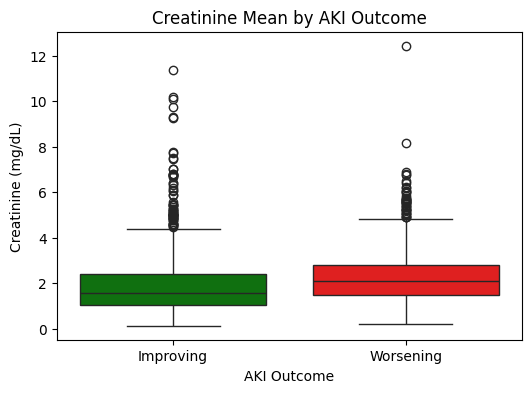

/tmp/ipykernel_1763796/4260751510.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


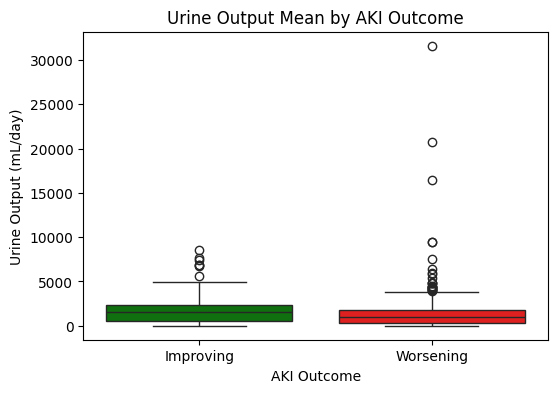

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.boxplot(
    x='label_display',
    y='creatinine_mean',
    data=df,
    palette={'Improving': 'green', 'Worsening': 'red'}
)
plt.title("Creatinine Mean by AKI Outcome")
plt.xlabel("AKI Outcome")
plt.ylabel("Creatinine (mg/dL)")
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(
    x='label_display',
    y='urine_output_mean',
    data=df,
    palette={'Improving': 'green', 'Worsening': 'red'}
)
plt.title("Urine Output Mean by AKI Outcome")
plt.xlabel("AKI Outcome")
plt.ylabel("Urine Output (mL/day)")
plt.show()

In [78]:

df['label_binary'] = df['label'].map({'Improving_Recovered': 1, 'Worsening': 0})

continuous_vars = [
    'creatinine_mean', 'creatinine_change', 'first_creat', 'last_creat',
    'urine_output_mean', 'recovery_ratio',
    'map_mean', 'sbp_mean', 'lactate_mean', 'age'
]

df[continuous_vars + ['label_binary']].head()

,creatinine_mean,creatinine_change,first_creat,last_creat,urine_output_mean,recovery_ratio,map_mean,sbp_mean,lactate_mean,age,label_binary
0,1.175000,0.0,1.1,1.1,3465.454545,1.000000,70.854237,108.023729,2.166667,76,1
1,2.497222,-0.1,1.5,1.6,106.666667,0.937500,74.378049,107.659091,6.775000,68,1
2,1.786667,-2.0,1.1,3.1,820.777778,0.354839,73.918367,110.857143,1.926087,52,0
3,2.391244,-2.1,0.8,2.9,1063.467290,0.275862,75.543478,119.424242,2.071429,59,0
4,1.082884,-0.9,0.5,1.4,1367.041667,0.357143,83.741636,111.830882,9.942857,23,0


In [79]:
print(df.columns.tolist())

['subject_id', 'urine_output_mean', 'creatinine_mean', 'first_creat', 'last_creat', 'recovery_ratio', 'recovery_class', 'map_mean', 'sbp_mean', 'lactate_mean', 'age', 'label', 'creatinine_change', 'label_display', 'label_binary']


In [80]:
df['label_binary'] = df['label'].map({
    'Improving_Recovered': 1,
    'Worsening': 0
})

print(df[['label', 'label_binary']].head())

                 label  label_binary
0  Improving_Recovered             1
1  Improving_Recovered             1
2            Worsening             0
3            Worsening             0
4            Worsening             0


In [81]:
from scipy.stats import pointbiserialr

print("Point-biserial correlation with label (1=Improving, 0=Worsening):\n")
for col in continuous_vars:
    r, p = pointbiserialr(df['label_binary'], df[col])
    print(f"{col:18}: r = {r:.4f}, p = {p:.4e}")

Point-biserial correlation with label (1=Improving, 0=Worsening):

creatinine_mean   : r = -0.1405, p = 1.0862e-13
creatinine_change : r = 0.5956, p = 7.1270e-266
first_creat       : r = 0.2033, p = 3.0053e-27
last_creat        : r = -0.4204, p = 3.9901e-119
urine_output_mean : r = 0.1279, p = 1.3967e-11
recovery_ratio    : r = 0.4815, p = 6.4790e-161
map_mean          : r = 0.0453, p = 1.7015e-02
sbp_mean          : r = 0.0955, p = 4.7619e-07
lactate_mean      : r = -0.0208, p = 2.7366e-01
age               : r = -0.0554, p = 3.5062e-03


In [82]:
from scipy import stats

group_improving = df[df['label'] == 'Improving_Recovered']
group_worsening = df[df['label'] == 'Worsening']

print("Independent t-test (Welch) results:\n")
for col in continuous_vars:
    t_stat, p_val = stats.ttest_ind(
        group_improving[col], group_worsening[col],
        equal_var=False
    )
    print(f"{col:18}: t = {t_stat:.4f}, p = {p_val:.4e}")

print("\nMann–Whitney U test results:\n")
for col in continuous_vars:
    u_stat, p_val = stats.mannwhitneyu(
        group_improving[col], group_worsening[col],
        alternative='two-sided'
    )
    print(f"{col:18}: U = {u_stat:.4f}, p = {p_val:.4e}")

Independent t-test (Welch) results:

creatinine_mean   : t = -7.4678, p = 1.0918e-13
creatinine_change : t = 39.0268, p = 2.1949e-265
first_creat       : t = 10.9286, p = 5.0493e-27
last_creat        : t = -24.3829, p = 4.3231e-118
urine_output_mean : t = 6.7868, p = 1.4114e-11
recovery_ratio    : t = 28.9178, p = 7.5502e-146
map_mean          : t = 2.3878, p = 1.7024e-02
sbp_mean          : t = 5.0477, p = 4.7626e-07
lactate_mean      : t = -1.0949, p = 2.7376e-01
age               : t = -2.9220, p = 3.5062e-03

Mann–Whitney U test results:

creatinine_mean   : U = 720596.5000, p = 4.8885e-30
creatinine_change : U = 1914853.5000, p = 0.0000e+00
first_creat       : U = 1104282.5000, p = 8.4029e-12
last_creat        : U = 381203.0000, p = 1.3419e-166
urine_output_mean : U = 1147615.0000, p = 6.6228e-19
recovery_ratio    : U = 1920996.0000, p = 0.0000e+00
map_mean          : U = 1100072.0000, p = 3.4834e-11
sbp_mean          : U = 1062613.0000, p = 1.2558e-06
lactate_mean      : U = 8265

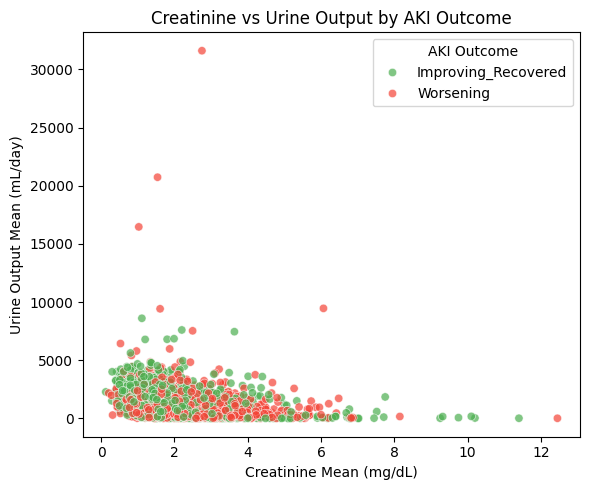

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='creatinine_mean',
    y='urine_output_mean',
    hue='label',
    palette={'Improving_Recovered': '#4CAF50', 'Worsening': '#F44336'},
    alpha=0.7
)
plt.title("Creatinine vs Urine Output by AKI Outcome")
plt.xlabel("Creatinine Mean (mg/dL)")
plt.ylabel("Urine Output Mean (mL/day)")
plt.legend(title="AKI Outcome")
plt.tight_layout()
plt.show()

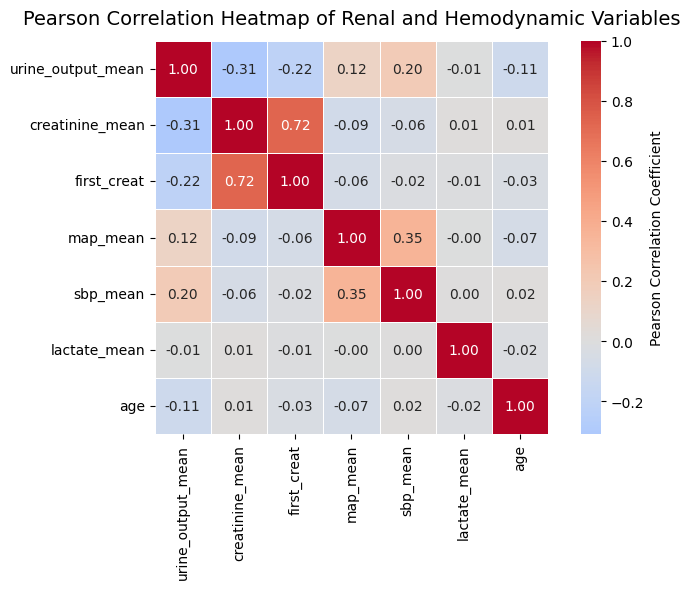

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_cols = [
    'urine_output_mean',
    'creatinine_mean',
    'first_creat',
    'map_mean',
    'sbp_mean',
    'lactate_mean',
    'age',
]
corr_df = df[corr_cols]
corr_matrix = corr_df.corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Pearson Correlation Coefficient"}
)
plt.title(
    "Pearson Correlation Heatmap of Renal and Hemodynamic Variables",
    fontsize=14,
    pad=12
)
plt.tight_layout()
plt.show()

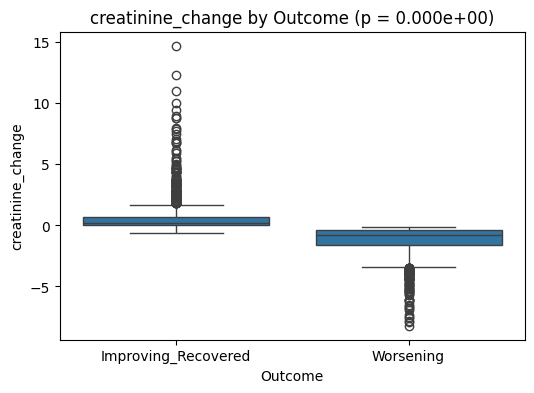

In [13]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

feature = 'creatinine_change'

# Split data
improve = df[df['label'] == 'Improving_Recovered'][feature]
worsen = df[df['label'] == 'Worsening'][feature]

# Mann–Whitney U test
stat, p = mannwhitneyu(improve, worsen, alternative='two-sided')

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y=feature, data=df)

plt.title(f"{feature} by Outcome (p = {p:.3e})")
plt.xlabel('Outcome')
plt.ylabel(feature)
plt.show()

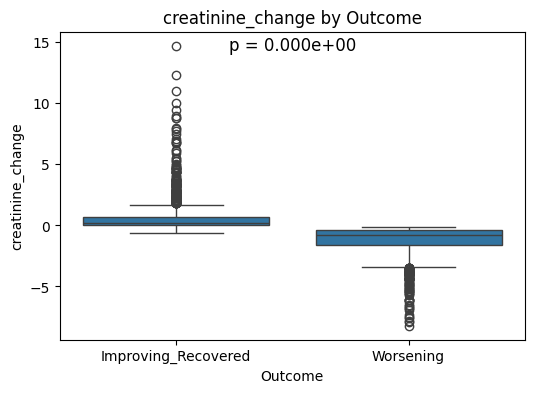

In [14]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

feature = 'creatinine_change'

improve = df[df['label'] == 'Improving_Recovered'][feature]
worsen = df[df['label'] == 'Worsening'][feature]

# Mann–Whitney U test
stat, p = mannwhitneyu(improve, worsen)

plt.figure(figsize=(6,4))
sns.boxplot(x='label', y=feature, data=df)

# Add p-value on plot
plt.text(0.5, max(df[feature])*0.95, f"p = {p:.3e}",
         ha='center', va='bottom', fontsize=12)

plt.title(f"{feature} by Outcome")
plt.xlabel('Outcome')
plt.ylabel(feature)
plt.show()


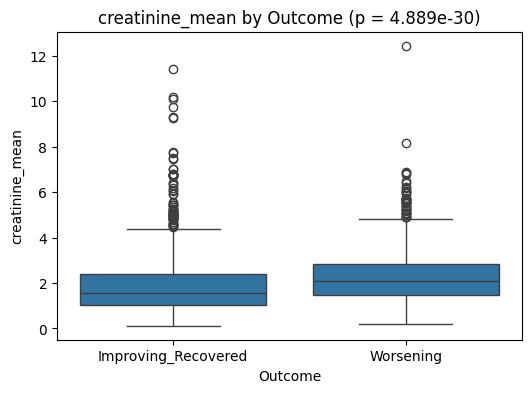

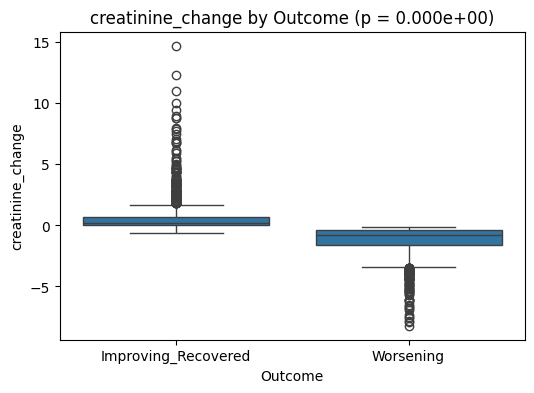

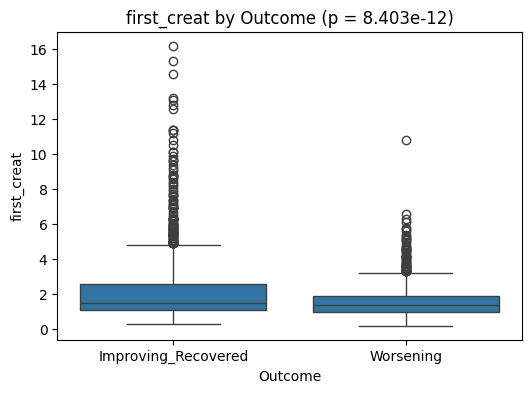

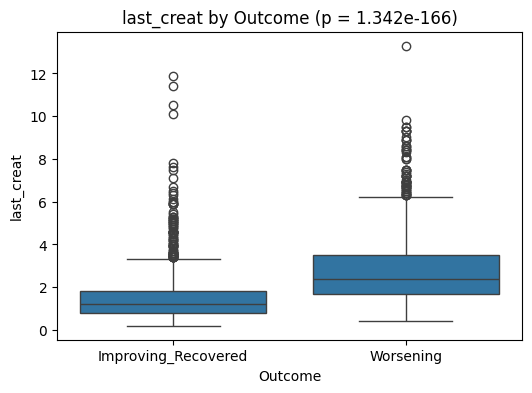

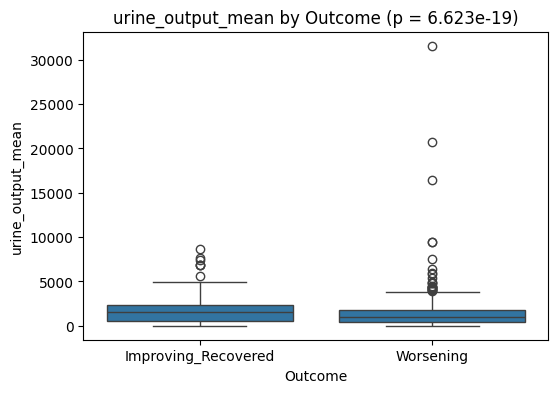

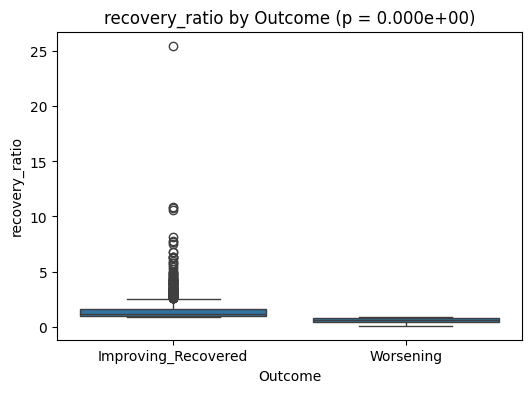

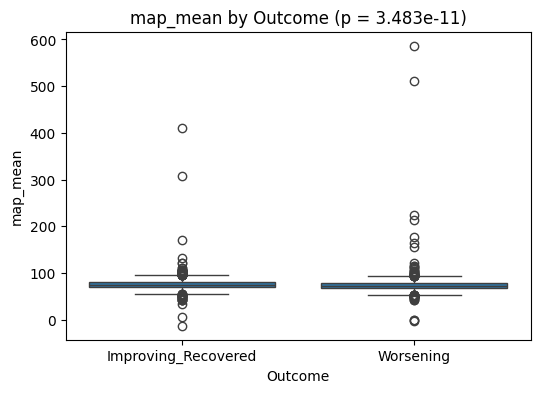

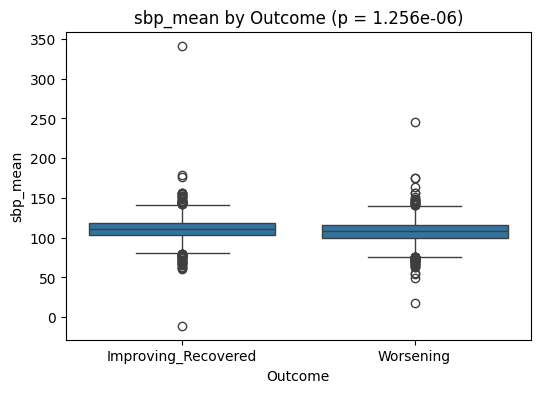

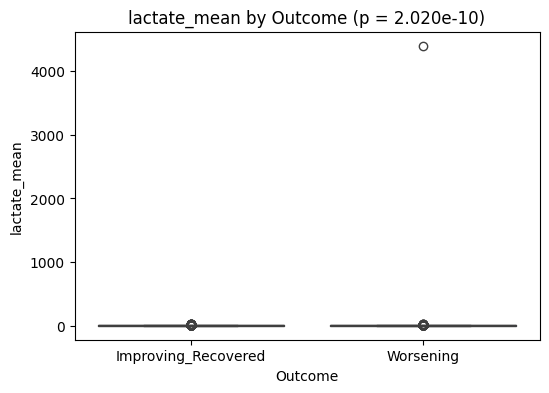

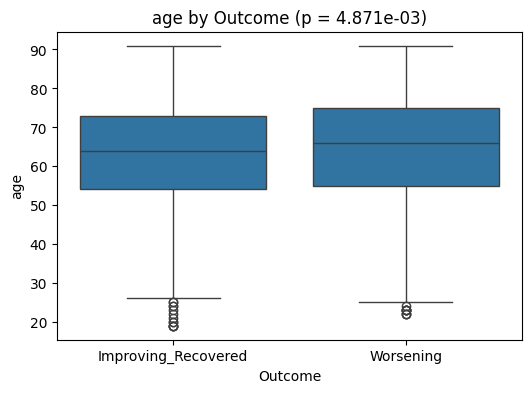

In [15]:
from scipy.stats import mannwhitneyu

features = [
    'creatinine_mean',
    'creatinine_change',
    'first_creat',
    'last_creat',
    'urine_output_mean',
    'recovery_ratio',
    'map_mean',
    'sbp_mean',
    'lactate_mean',
    'age'
]

for feature in features:
    improve = df[df['label'] == 'Improving_Recovered'][feature]
    worsen  = df[df['label'] == 'Worsening'][feature]

    stat, p = mannwhitneyu(improve, worsen)

    plt.figure(figsize=(6,4))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f"{feature} by Outcome (p = {p:.3e})")
    plt.xlabel("Outcome")
    plt.ylabel(feature)
    plt.show()


In [16]:
import pandas as pd

pval_table = pd.DataFrame({
    "Variable": [
        "Creatinine Mean",
        "Urine Output Mean",
        "MAP",
        "SBP",
        "Age"
    ],
    "Test Used": [
        "Mann–Whitney U",
        "Mann–Whitney U",
        "Welch t-test",
        "Welch t-test",
        "Welch t-test"
    ],
    "p-value": [
        "< 0.001",
        "< 0.001",
        "0.017",
        "< 0.001",
        "0.004"
    ]
})

pval_table


,Variable,Test Used,p-value
0,Creatinine Mean,Mann–Whitney U,< 0.001
1,Urine Output Mean,Mann–Whitney U,< 0.001
2,MAP,Welch t-test,0.017
3,SBP,Welch t-test,< 0.001
4,Age,Welch t-test,0.004


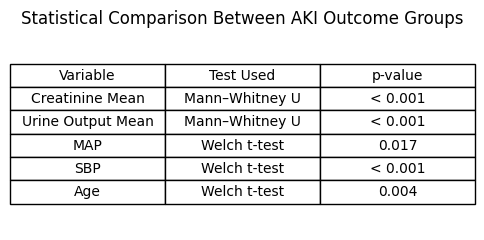

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')

table = ax.table(
    cellText=pval_table.values,
    colLabels=pval_table.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.title("Statistical Comparison Between AKI Outcome Groups", pad=10)
plt.show()


In [16]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mldataset.csv")
df['label_binary'] = df['label'].map({'Improving_Recovered': 1, 'Worsening': 0})

print(df['label'].value_counts())
print("Shape:", df.shape)

features = [
    'first_creat',
    'creatinine_mean',      
    'urine_output_mean',
    'map_mean',
    'sbp_mean',
    'lactate_mean',
    'age'
]

X = df[features]
y = df['label_binary']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    use_scaled = name != "Random Forest"
    X_train_used = X_train_scaled if use_scaled else X_train
    X_test_used  = X_test_scaled  if use_scaled else X_test

    model.fit(X_train_used, y_train)
    y_pred = model.predict(X_test_used)
    y_prob = model.predict_proba(X_test_used)[:, 1]

    results[name] = {
        'Accuracy':  accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall':    recall_score(y_test, y_pred),
        'F1 Score':  f1_score(y_test, y_pred),
        'ROC-AUC':   roc_auc_score(y_test, y_prob)
    }

results_df = pd.DataFrame(results).T
print("\nModel performance (no leakage):")
print(results_df)
%matplotlib inline


label
Improving_Recovered    1386
Worsening              1386
Name: count, dtype: int64
Shape: (2772, 14)
Train shape: (2217, 7)
Test shape : (555, 7)

Model performance (no leakage):
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.798198   0.789474  0.812274  0.800712  0.870179
Random Forest        0.778378   0.778986  0.776173  0.777577  0.841902
Gradient Boosting    0.801802   0.822394  0.768953  0.794776  0.864374


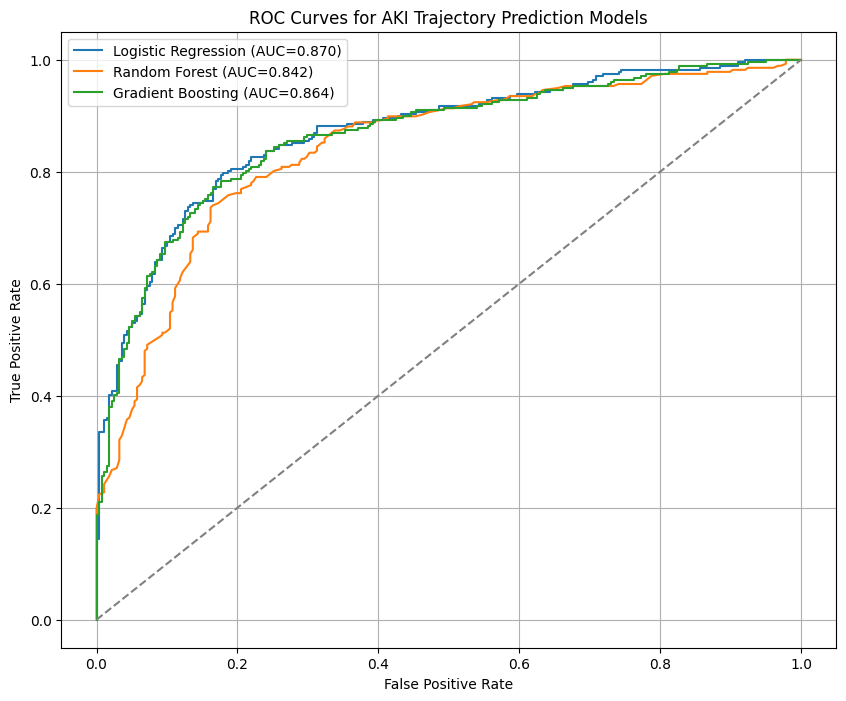

In [17]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    use_scaled = name != "Random Forest"
    X_test_used = X_test_scaled if use_scaled else X_test
    y_prob = model.predict_proba(X_test_used)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.3f})')

plt.plot([0, 1], [0, 1], '--', color='gray')

plt.title("ROC Curves for AKI Trajectory Prediction Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

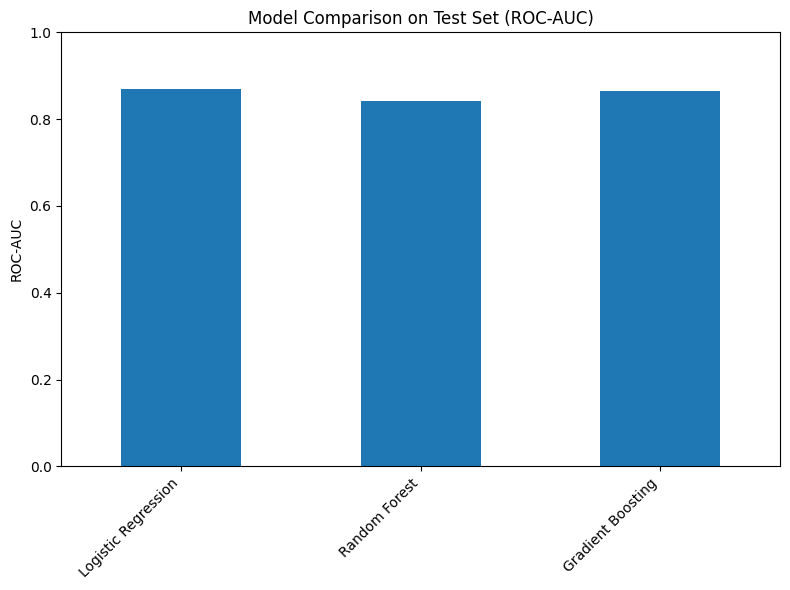

In [18]:
plt.figure(figsize=(8, 6))
results_df['ROC-AUC'].plot(kind='bar')

plt.title('Model Comparison on Test Set (ROC-AUC)')
plt.ylabel('ROC-AUC')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

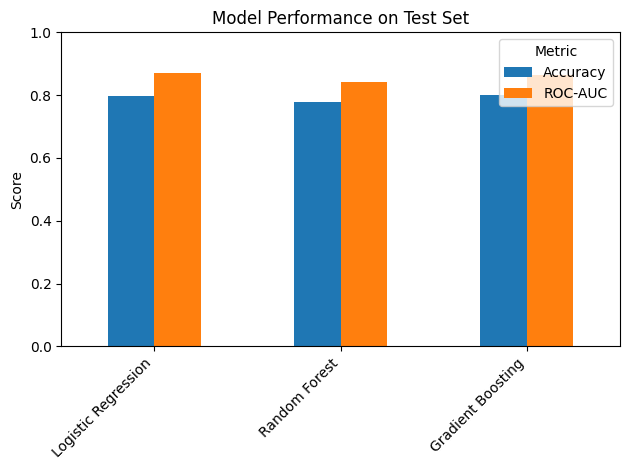

In [19]:
metrics_to_plot = ['Accuracy', 'ROC-AUC']

plt.figure(figsize=(8, 6))
results_df[metrics_to_plot].plot(kind='bar')
plt.title('Model Performance on Test Set')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


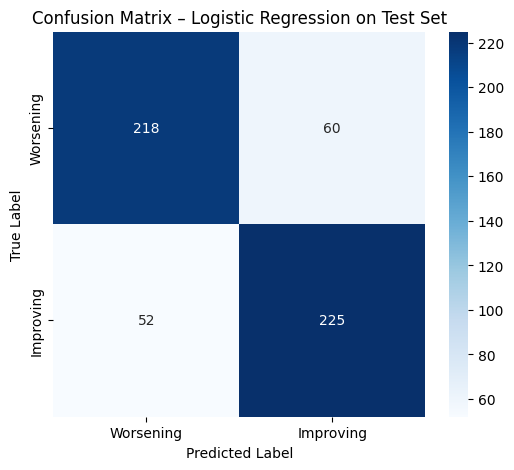

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = models['Logistic Regression'].predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Worsening', 'Improving'],
            yticklabels=['Worsening', 'Improving'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression on Test Set")
plt.show()


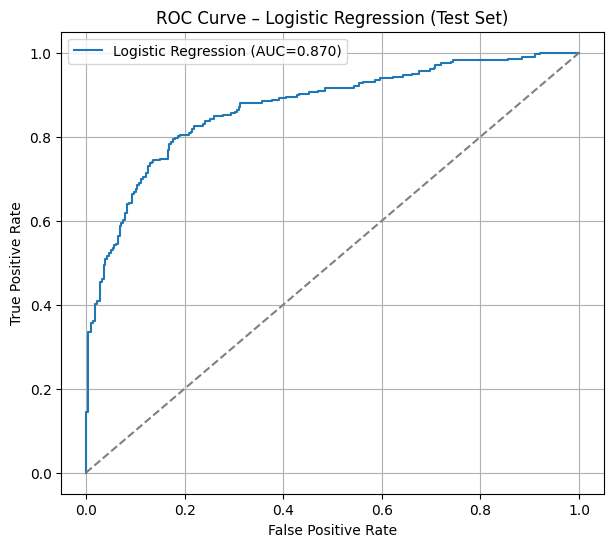

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = models['Logistic Regression'].predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


In [62]:
print("len(features):", len(features))
print("coef.shape:", coef.shape)


len(features): 10
coef.shape: (7,)
